<a href="https://colab.research.google.com/github/ajaythakur3369/Mentorness/blob/main/Task_2_Salary_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project - Salary Prediction**
## **Developed By - Ajay Thakur (ajaythakur3369@gmail.com)**
## **Branch Name - Electronics and Communication Engineering**
## **Institute Name - Indian Institute of Information Technology Kota (An Institute of National Importance under an Act of Parliament)**
## **Submitted To - Mentorness**
## **Project Link (GitHub) - [Click here](https://github.com/ajaythakur3369/Mentorness/blob/main/Task_2_Salary_Prediction.ipynb)**
## **Project Link (Drive) - [Click here](https://colab.research.google.com/drive/1fn5JCnWBI1SJ-hnDmDPMKaopgd5xTGDQ)**

# **Problem Statement -**

Salaries in the field of data professions vary widely based on factors such as experience, job role, and performance. Accurately predicting salaries for data professionals is essential for both job seekers and employers.  

# **Let's Begin !**

**Import Libraries**

In [ ]:
# Import all the required libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

**Reading the dataset**

In [ ]:
# Access the Drive from Colab, to access the file
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/folders/salary_prediction_data.csv')
df.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


In [ ]:
df.shape

(2639, 13)

**EDA**

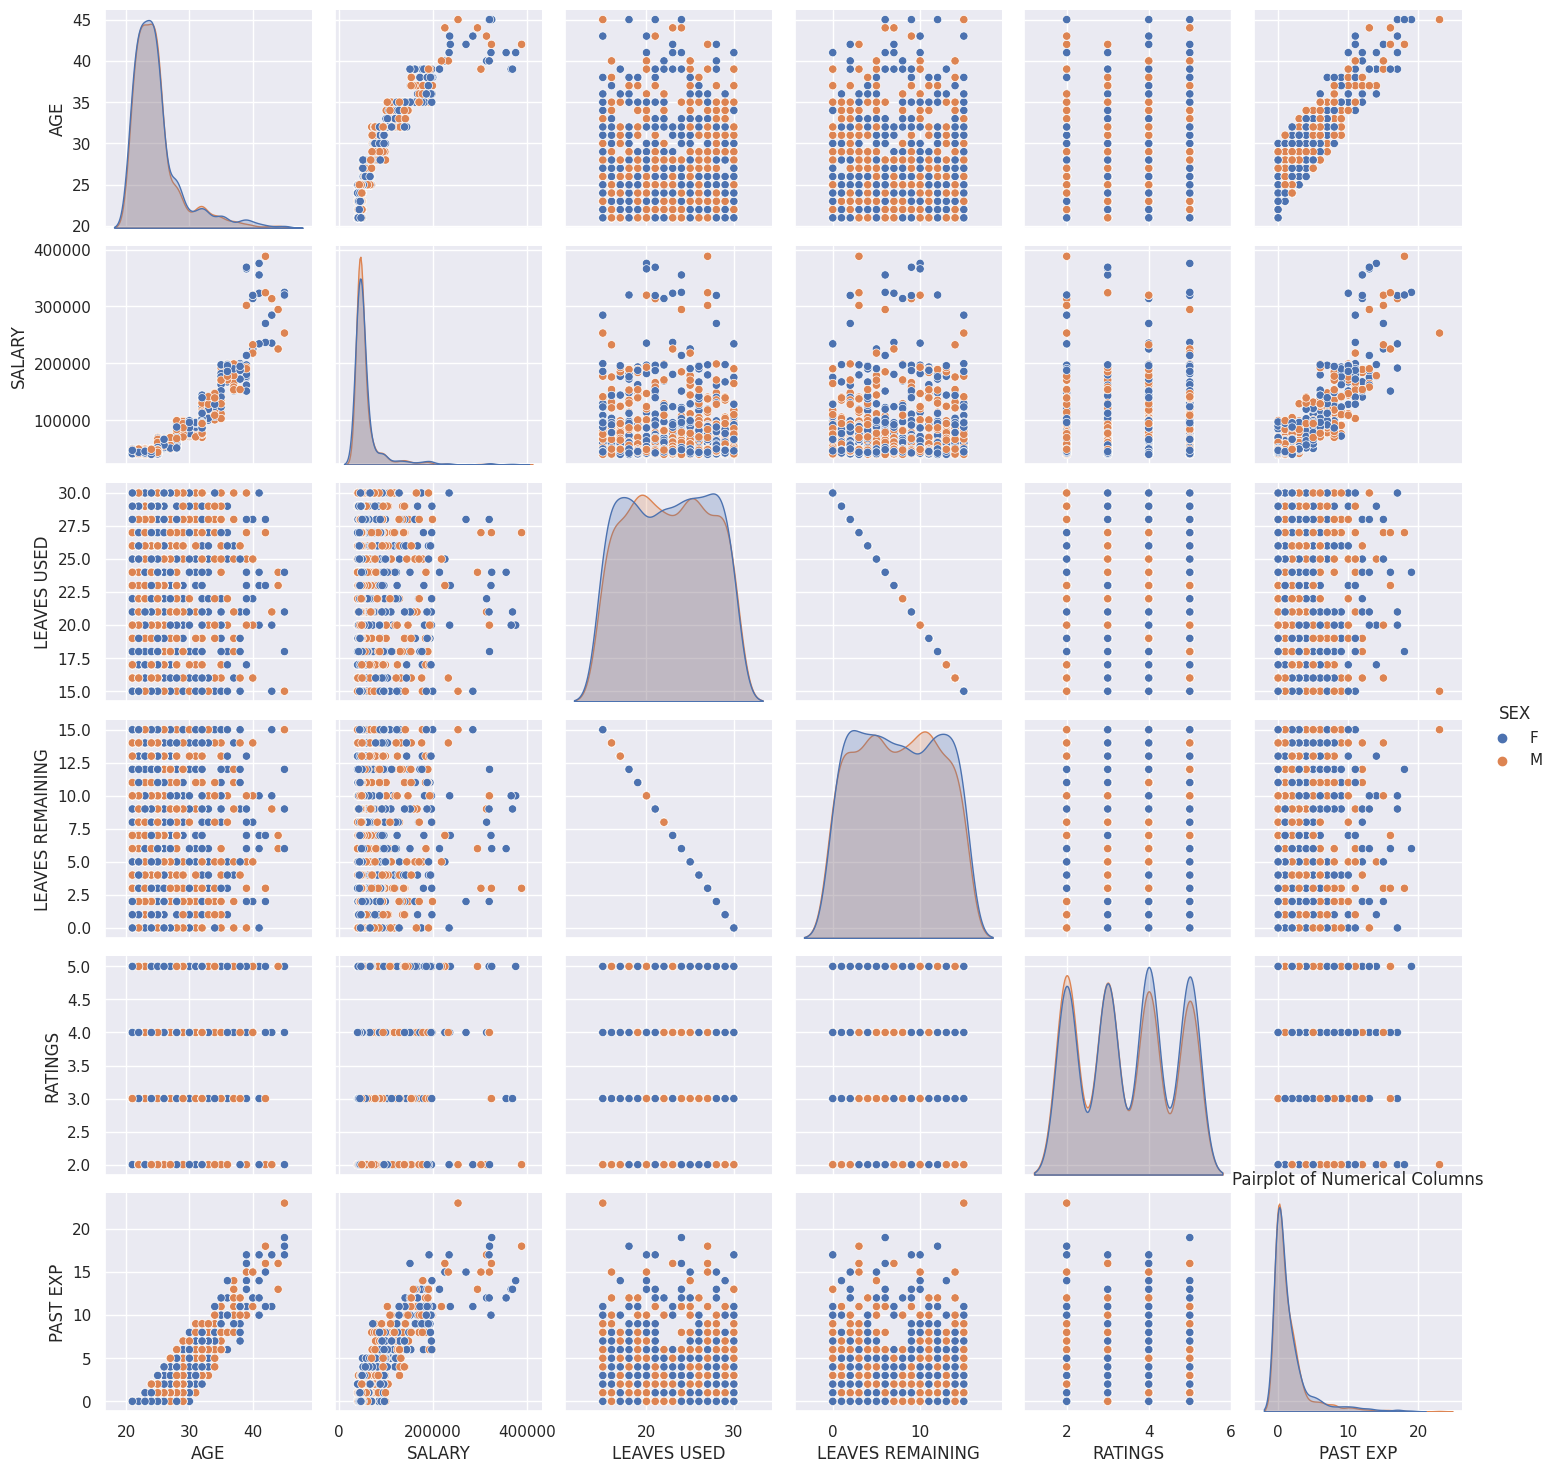

In [ ]:
# Pairplot for numerical columns
sns.pairplot(df.dropna(), hue = 'SEX', diag_kind = 'kde')
plt.title('Pairplot of Numerical Columns')
plt.show()

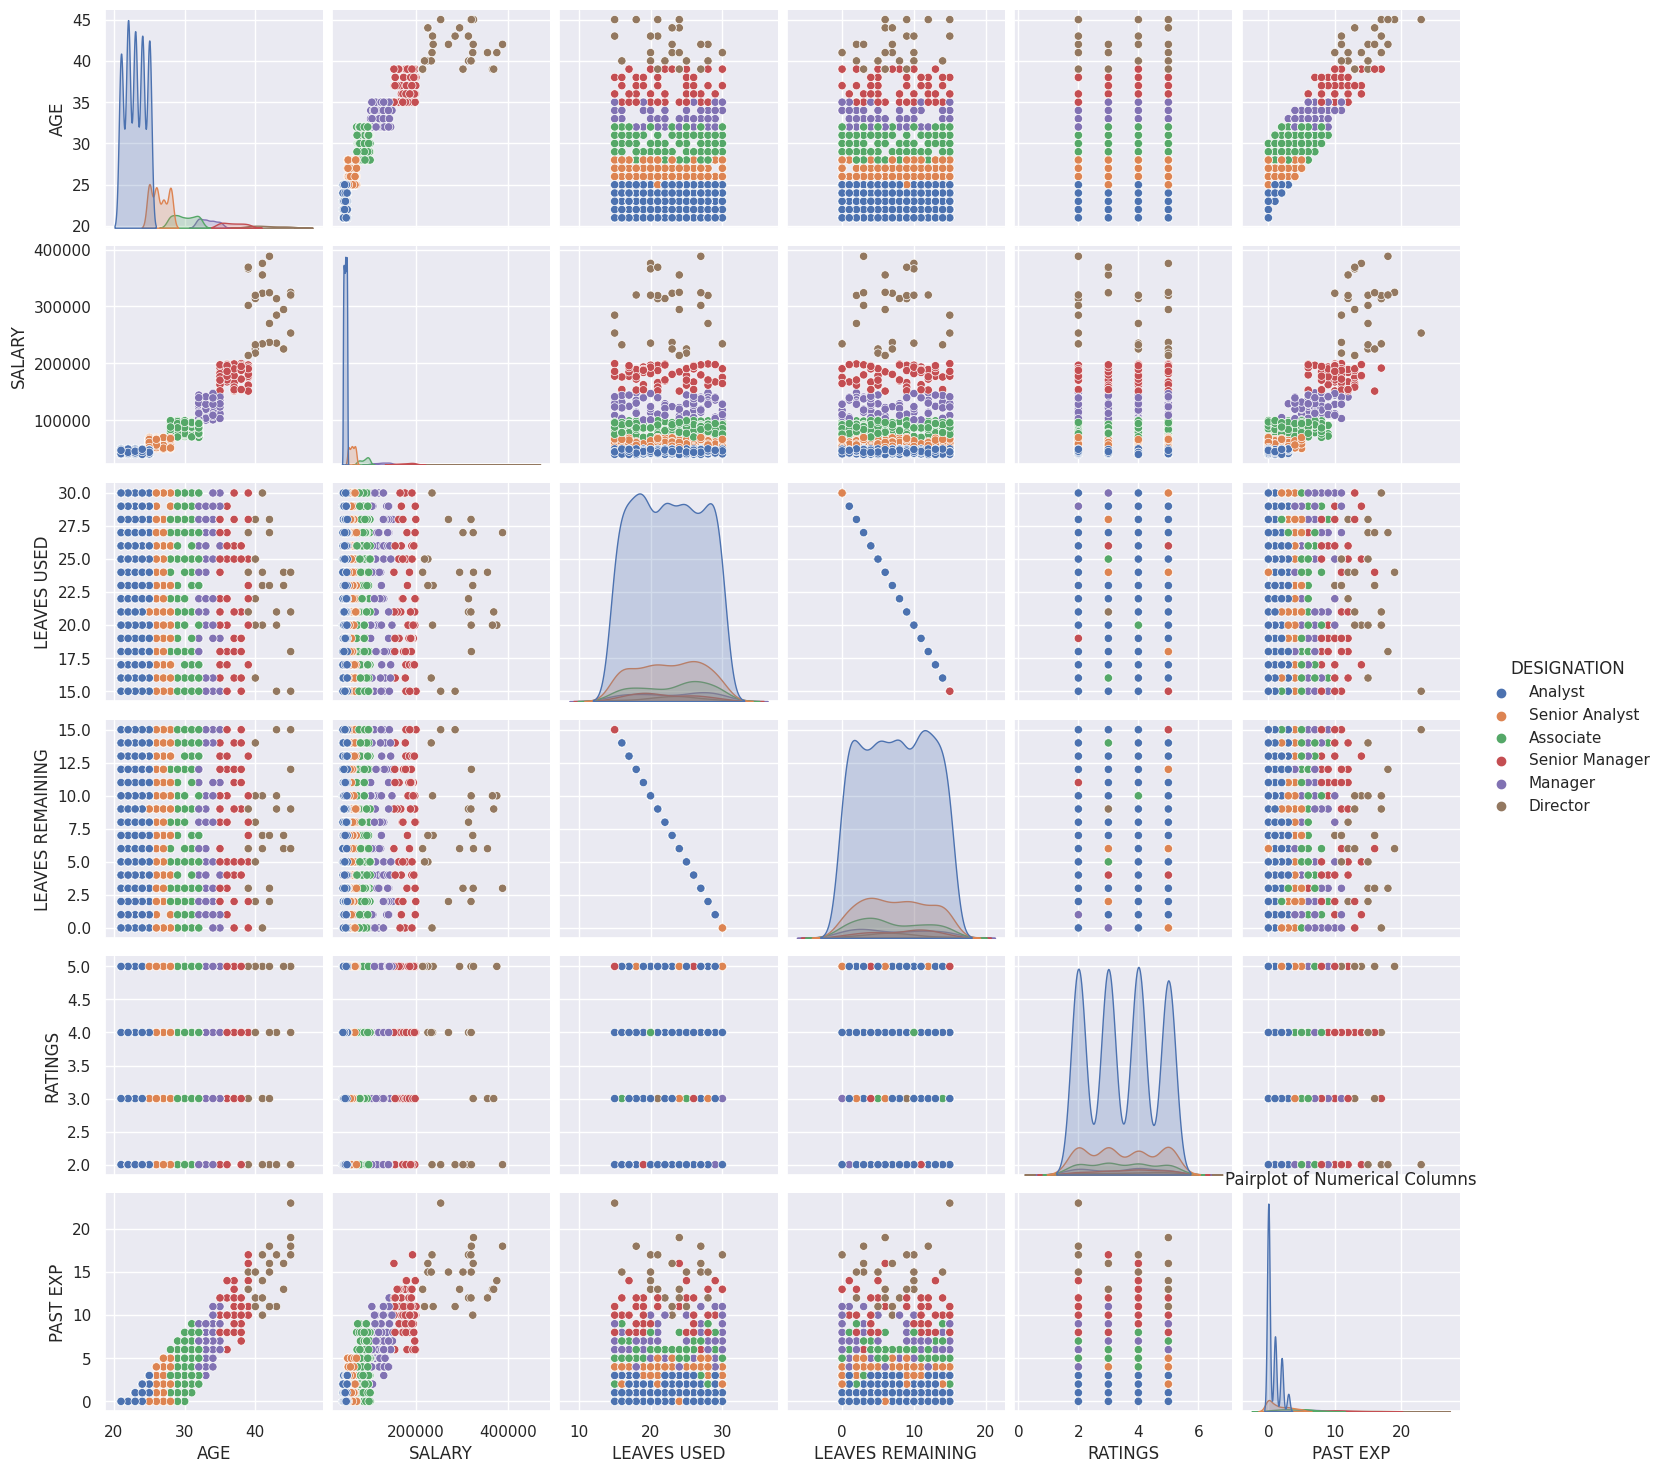

In [ ]:
sns.pairplot(df.dropna(), hue = 'DESIGNATION', diag_kind = 'kde')
plt.title('Pairplot of Numerical Columns')
plt.show()

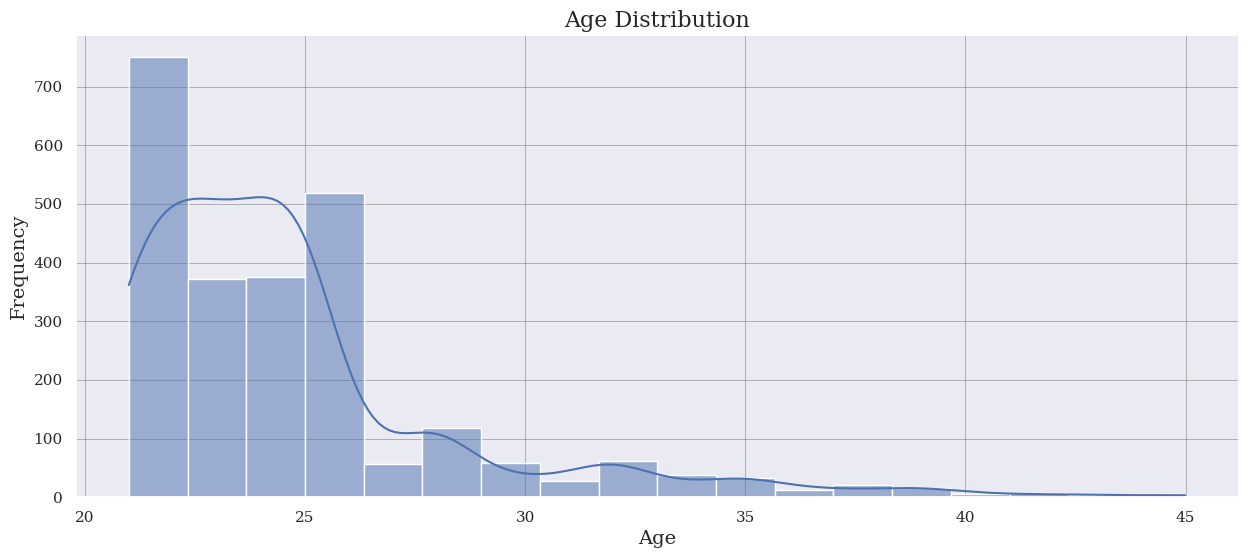

In [ ]:
# Distribution plot for Age
plt.figure(figsize = (15, 6))
plt.grid(True, color = "grey", linewidth = "0.4")
sns.histplot(df['AGE'].dropna(), kde = True, bins = 18)
plt.xlabel('Age', fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel('Frequency', fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('Age Distribution', fontname = 'serif', fontsize = 16)
plt.show()

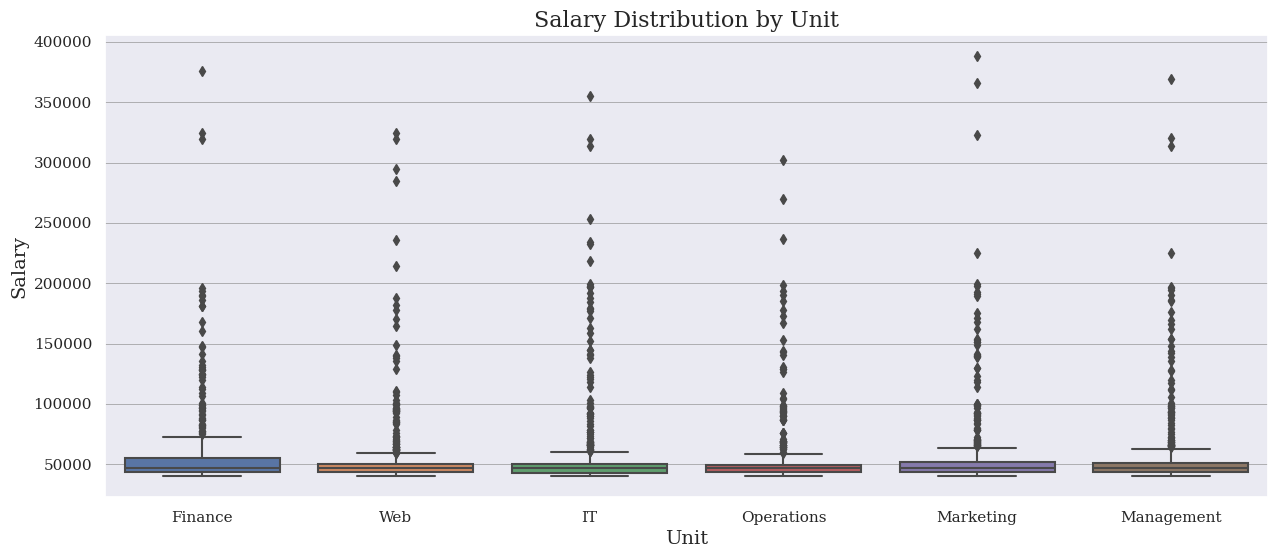

In [ ]:
plt.figure(figsize = (15, 6))
plt.grid(True, color = "grey", linewidth = "0.4")
sns.boxplot(x = 'UNIT', y = 'SALARY', data = df)
plt.xlabel('Unit', fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel('Salary', fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('Salary Distribution by Unit', fontname = 'serif', fontsize = 16)
plt.show()

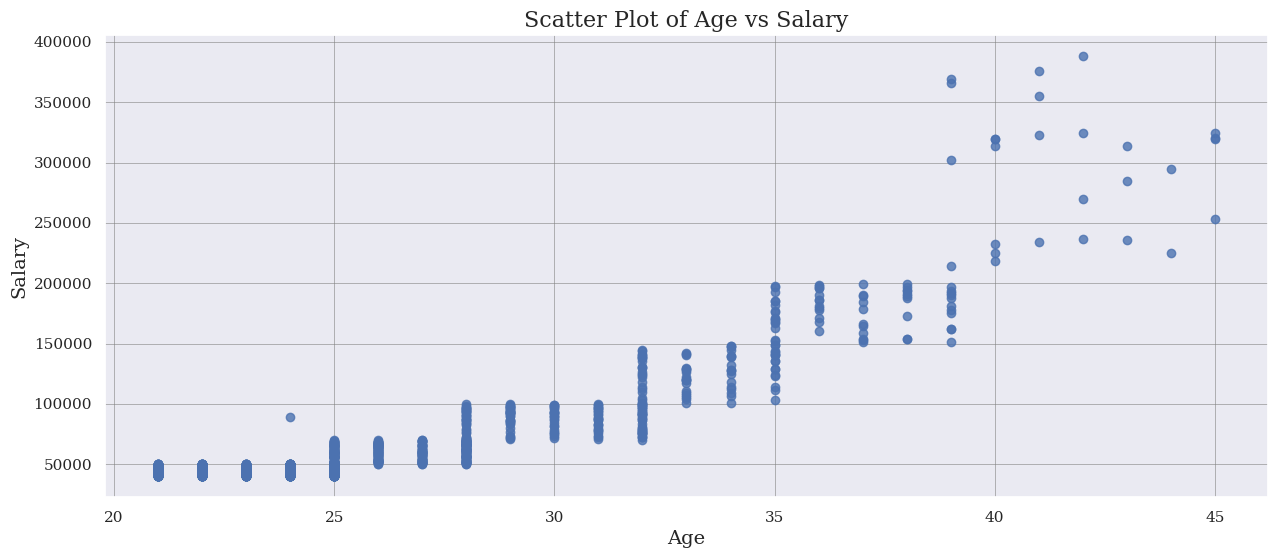

In [ ]:
# Scatter plot for Age vs Salary
plt.figure(figsize = (15, 6))
plt.grid(True, color = "grey", linewidth = "0.4")
plt.scatter(df['AGE'], df['SALARY'], alpha = 0.8)
plt.xlabel('Age', fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel('Salary', fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('Scatter Plot of Age vs Salary', fontname = 'serif', fontsize = 16)
plt.show()

**Feature Engineering**

In [ ]:
# Checking for duplicate values
df.duplicated().sum()

161

In [ ]:
df[df.duplicated(keep = False)]

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
17,ROYCE,AGOSTO,M,06-07-2014,01-07-2016,Analyst,24.0,48651,Web,27.0,3.0,5.0,1
32,FOSTER,ALDERMAN,M,5-22-2014,01-07-2016,Senior Analyst,26.0,68295,Operations,28.0,2.0,5.0,3
36,HILLARY,ANTONIA,F,12-17-2014,01-07-2016,Analyst,23.0,45389,Management,27.0,3.0,2.0,1
38,ROSIE,AMILL,F,2-18-2013,01-07-2016,Analyst,24.0,49901,Web,24.0,6.0,4.0,0
47,GILDA,ARANCIBIA,F,5-22-2013,01-07-2016,Analyst,23.0,40264,Web,24.0,6.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2576,ROMEO,AINSLEY,M,11-20-2014,01-07-2016,Analyst,23.0,41052,IT,15.0,15.0,5.0,1
2591,ROYCE,AGOSTO,M,06-07-2014,01-07-2016,Analyst,24.0,48651,Web,27.0,3.0,5.0,1
2600,SHEREE,APPEL,F,9-24-2013,01-07-2016,Analyst,25.0,49559,Management,22.0,8.0,5.0,2
2624,JOSPEH,ALLIS,M,2-26-2014,01-07-2016,Analyst,22.0,45364,Web,20.0,10.0,2.0,0


In [ ]:
# Dropping the duplicates
df.drop_duplicates(inplace = True)

In [ ]:
# First name and last name not needed so dropped
df.drop(['FIRST NAME', 'LAST NAME'], axis = 1, inplace = True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.head()

,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


In [ ]:
df.nunique()

SEX                    2
DOJ                  967
CURRENT DATE           1
DESIGNATION            6
AGE                   25
SALARY              2305
UNIT                   6
LEAVES USED           16
LEAVES REMAINING      16
RATINGS                4
PAST EXP              21
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2478 entries, 0 to 2638
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SEX               2478 non-null   object 
 1   DOJ               2477 non-null   object 
 2   CURRENT DATE      2478 non-null   object 
 3   DESIGNATION       2478 non-null   object 
 4   AGE               2475 non-null   float64
 5   SALARY            2478 non-null   int64  
 6   UNIT              2478 non-null   object 
 7   LEAVES USED       2475 non-null   float64
 8   LEAVES REMAINING  2476 non-null   float64
 9   RATINGS           2476 non-null   float64
 10  PAST EXP          2478 non-null   int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 232.3+ KB


In [ ]:
# Change datatype of DOJ and current date to date_time format
df['DOJ'] = pd.to_datetime(df['DOJ'], errors = 'coerce')
df['CURRENT DATE'] = pd.to_datetime(df['CURRENT DATE'], errors = 'coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2478 entries, 0 to 2638
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   SEX               2478 non-null   object        
 1   DOJ               2477 non-null   datetime64[ns]
 2   CURRENT DATE      2478 non-null   datetime64[ns]
 3   DESIGNATION       2478 non-null   object        
 4   AGE               2475 non-null   float64       
 5   SALARY            2478 non-null   int64         
 6   UNIT              2478 non-null   object        
 7   LEAVES USED       2475 non-null   float64       
 8   LEAVES REMAINING  2476 non-null   float64       
 9   RATINGS           2476 non-null   float64       
 10  PAST EXP          2478 non-null   int64         
dtypes: datetime64[ns](2), float64(4), int64(2), object(3)
memory usage: 232.3+ KB


In [ ]:
df.head()

,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,F,2014-05-18,2016-01-07,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,F,NaT,2016-01-07,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,F,2014-07-28,2016-01-07,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,F,2013-04-03,2016-01-07,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,M,2014-11-20,2016-01-07,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


In [ ]:
# DOJ and current date columns can be merged to one feature (Years of experience in org(YOE_ORG))
df['YOE_ORG'] = (df['CURRENT DATE'] - df['DOJ']).dt.days/365.25

In [ ]:
df.head()

,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,YOE_ORG
0,F,2014-05-18,2016-01-07,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0,1.639973
1,F,NaT,2016-01-07,Associate,NaN,89207,Web,NaN,13.0,NaN,7,NaN
2,F,2014-07-28,2016-01-07,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0,1.445585
3,F,2013-04-03,2016-01-07,Analyst,22.0,45550,IT,22.0,8.0,3.0,0,2.762491
4,M,2014-11-20,2016-01-07,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3,1.130732


In [ ]:
df['YOE_ORG'] = df['YOE_ORG'].round(1)

In [ ]:
df.head()

,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,YOE_ORG
0,F,2014-05-18,2016-01-07,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0,1.6
1,F,NaT,2016-01-07,Associate,NaN,89207,Web,NaN,13.0,NaN,7,NaN
2,F,2014-07-28,2016-01-07,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0,1.4
3,F,2013-04-03,2016-01-07,Analyst,22.0,45550,IT,22.0,8.0,3.0,0,2.8
4,M,2014-11-20,2016-01-07,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3,1.1


In [ ]:
# Now drop the DOJ and current date columns, since they are not needed anymore
df.drop(['DOJ', 'CURRENT DATE'], axis = 1, inplace = True)

In [ ]:
df.head()

,SEX,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,YOE_ORG
0,F,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0,1.6
1,F,Associate,NaN,89207,Web,NaN,13.0,NaN,7,NaN
2,F,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0,1.4
3,F,Analyst,22.0,45550,IT,22.0,8.0,3.0,0,2.8
4,M,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3,1.1


In [ ]:
# Checking for null values
df.isnull().sum()

SEX                 0
DESIGNATION         0
AGE                 3
SALARY              0
UNIT                0
LEAVES USED         3
LEAVES REMAINING    2
RATINGS             2
PAST EXP            0
YOE_ORG             1
dtype: int64

In [ ]:
df['sum leaves'] = df['LEAVES USED'] + df['LEAVES REMAINING']

In [ ]:
df.head()

,SEX,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,YOE_ORG,sum leaves
0,F,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0,1.6,30.0
1,F,Associate,NaN,89207,Web,NaN,13.0,NaN,7,NaN,NaN
2,F,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0,1.4,30.0
3,F,Analyst,22.0,45550,IT,22.0,8.0,3.0,0,2.8,30.0
4,M,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3,1.1,30.0


In [ ]:
df.nunique()

SEX                    2
DESIGNATION            6
AGE                   25
SALARY              2305
UNIT                   6
LEAVES USED           16
LEAVES REMAINING      16
RATINGS                4
PAST EXP              21
YOE_ORG               53
sum leaves             1
dtype: int64

In [ ]:
df.describe()

,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,YOE_ORG,sum leaves
count,2475.000000,2478.000000,2475.000000,2476.000000,2476.000000,2478.000000,2477.000000,2473.0
mean,24.727273,58076.235270,22.493737,7.511309,3.481826,1.560129,2.189019,30.0
std,3.912591,36786.661873,4.598805,4.597438,1.115942,2.706363,0.903735,0.0
min,21.000000,40001.000000,15.000000,0.000000,2.000000,0.000000,0.900000,30.0
25%,22.000000,43401.250000,19.000000,4.000000,2.000000,0.000000,1.500000,30.0
50%,24.000000,46733.500000,22.000000,8.000000,3.000000,1.000000,2.100000,30.0
75%,25.000000,50323.750000,26.000000,11.000000,4.000000,2.000000,2.700000,30.0
max,45.000000,388112.000000,30.000000,15.000000,5.000000,23.000000,7.000000,30.0


In [ ]:
# It's observed that the total number of leaves for every employee is 30, so we can calculate the nan values for them and then drop one of the columns
df[df['LEAVES USED'].isnull()]

,SEX,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,YOE_ORG,sum leaves
1,F,Associate,NaN,89207,Web,NaN,13.0,NaN,7,NaN,NaN
11,M,Senior Manager,36.0,160613,Finance,NaN,11.0,2.0,9,5.9,NaN
19,M,Analyst,24.0,44665,Web,NaN,12.0,5.0,0,2.5,NaN


In [ ]:
df['LEAVES USED'].fillna(30-df['LEAVES REMAINING'], inplace = True)

In [ ]:
df.head()

,SEX,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,YOE_ORG,sum leaves
0,F,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0,1.6,30.0
1,F,Associate,NaN,89207,Web,17.0,13.0,NaN,7,NaN,NaN
2,F,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0,1.4,30.0
3,F,Analyst,22.0,45550,IT,22.0,8.0,3.0,0,2.8,30.0
4,M,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3,1.1,30.0


In [ ]:
# Now the leaves remaining column isn't needed since they are highly correlated
df.drop(['LEAVES REMAINING', 'sum leaves'], axis = 1, inplace = True)

In [ ]:
df.head()

,SEX,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,RATINGS,PAST EXP,YOE_ORG
0,F,Analyst,21.0,44570,Finance,24.0,2.0,0,1.6
1,F,Associate,NaN,89207,Web,17.0,NaN,7,NaN
2,F,Analyst,21.0,40955,Finance,23.0,3.0,0,1.4
3,F,Analyst,22.0,45550,IT,22.0,3.0,0,2.8
4,M,Analyst,NaN,43161,Operations,27.0,NaN,3,1.1


In [ ]:
df.isnull().sum()

SEX            0
DESIGNATION    0
AGE            3
SALARY         0
UNIT           0
LEAVES USED    0
RATINGS        2
PAST EXP       0
YOE_ORG        1
dtype: int64

In [ ]:
print(df['AGE'].median())
print(df['AGE'].mean())

24.0
24.727272727272727


In [ ]:
# Filling the age, yoe_org, and ratings nan values with median values
df['YOE_ORG'].fillna(df['YOE_ORG'].median(), inplace = True)
df['AGE'].fillna(df['AGE'].median(), inplace = True)
df['RATINGS'].fillna(df['RATINGS'].median(), inplace = True)

In [ ]:
df.isnull().sum()

SEX            0
DESIGNATION    0
AGE            0
SALARY         0
UNIT           0
LEAVES USED    0
RATINGS        0
PAST EXP       0
YOE_ORG        0
dtype: int64

In [ ]:
df.head()

,SEX,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,RATINGS,PAST EXP,YOE_ORG
0,F,Analyst,21.0,44570,Finance,24.0,2.0,0,1.6
1,F,Associate,24.0,89207,Web,17.0,3.0,7,2.1
2,F,Analyst,21.0,40955,Finance,23.0,3.0,0,1.4
3,F,Analyst,22.0,45550,IT,22.0,3.0,0,2.8
4,M,Analyst,24.0,43161,Operations,27.0,3.0,3,1.1


This will be our refined dataset on which we will preprocess

**Data Preprocessing**

In [ ]:
# Separate ind and dep variable
x = df.drop(['SALARY'], axis = 1)
y = df['SALARY']

In [ ]:
# Encoding- OHE
df_encoded = pd.get_dummies(x, columns = ['SEX', 'DESIGNATION', 'UNIT'])

In [ ]:
df_encoded.head()

,AGE,LEAVES USED,RATINGS,PAST EXP,YOE_ORG,SEX_F,SEX_M,DESIGNATION_Analyst,DESIGNATION_Associate,DESIGNATION_Director,DESIGNATION_Manager,DESIGNATION_Senior Analyst,DESIGNATION_Senior Manager,UNIT_Finance,UNIT_IT,UNIT_Management,UNIT_Marketing,UNIT_Operations,UNIT_Web
0,21.0,24.0,2.0,0,1.6,1,0,1,0,0,0,0,0,1,0,0,0,0,0
1,24.0,17.0,3.0,7,2.1,1,0,0,1,0,0,0,0,0,0,0,0,0,1
2,21.0,23.0,3.0,0,1.4,1,0,1,0,0,0,0,0,1,0,0,0,0,0
3,22.0,22.0,3.0,0,2.8,1,0,1,0,0,0,0,0,0,1,0,0,0,0
4,24.0,27.0,3.0,3,1.1,0,1,1,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
df_encoded.astype(float)

,AGE,LEAVES USED,RATINGS,PAST EXP,YOE_ORG,SEX_F,SEX_M,DESIGNATION_Analyst,DESIGNATION_Associate,DESIGNATION_Director,DESIGNATION_Manager,DESIGNATION_Senior Analyst,DESIGNATION_Senior Manager,UNIT_Finance,UNIT_IT,UNIT_Management,UNIT_Marketing,UNIT_Operations,UNIT_Web
0,21.0,24.0,2.0,0.0,1.6,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,24.0,17.0,3.0,7.0,2.1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,21.0,23.0,3.0,0.0,1.4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,22.0,22.0,3.0,0.0,2.8,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,24.0,27.0,3.0,3.0,1.1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634,36.0,15.0,5.0,10.0,4.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2635,23.0,17.0,2.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2636,21.0,29.0,5.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2637,24.0,23.0,3.0,1.0,1.8,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Standardization
from sklearn.preprocessing import StandardScaler
numerical_columns = ['AGE', 'LEAVES USED', 'RATINGS', 'PAST EXP', 'YOE_ORG']

# Initialize StandardScaler
scaler = StandardScaler()

# Apply standardization to numerical columns
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

In [ ]:
x = df_encoded.astype(float)

In [ ]:
x

,AGE,LEAVES USED,RATINGS,PAST EXP,YOE_ORG,SEX_F,SEX_M,DESIGNATION_Analyst,DESIGNATION_Associate,DESIGNATION_Director,DESIGNATION_Manager,DESIGNATION_Senior Analyst,DESIGNATION_Senior Manager,UNIT_Finance,UNIT_IT,UNIT_Management,UNIT_Marketing,UNIT_Operations,UNIT_Web
0,-0.953160,0.328786,-1.328226,-0.576583,-0.651983,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-0.185801,-1.193670,-0.431646,2.010436,-0.098501,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.953160,0.111292,-0.431646,-0.576583,-0.873375,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-0.697374,-0.106201,-0.431646,-0.576583,0.676373,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.185801,0.981267,-0.431646,0.532139,-1.205465,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634,2.883634,-1.628657,1.361513,3.119158,2.558211,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2635,-0.441587,-1.193670,-1.328226,-0.576583,-0.209197,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2636,-0.953160,1.416254,1.361513,-0.576583,-0.209197,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2637,-0.185801,0.111292,-0.431646,-0.207009,-0.430590,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


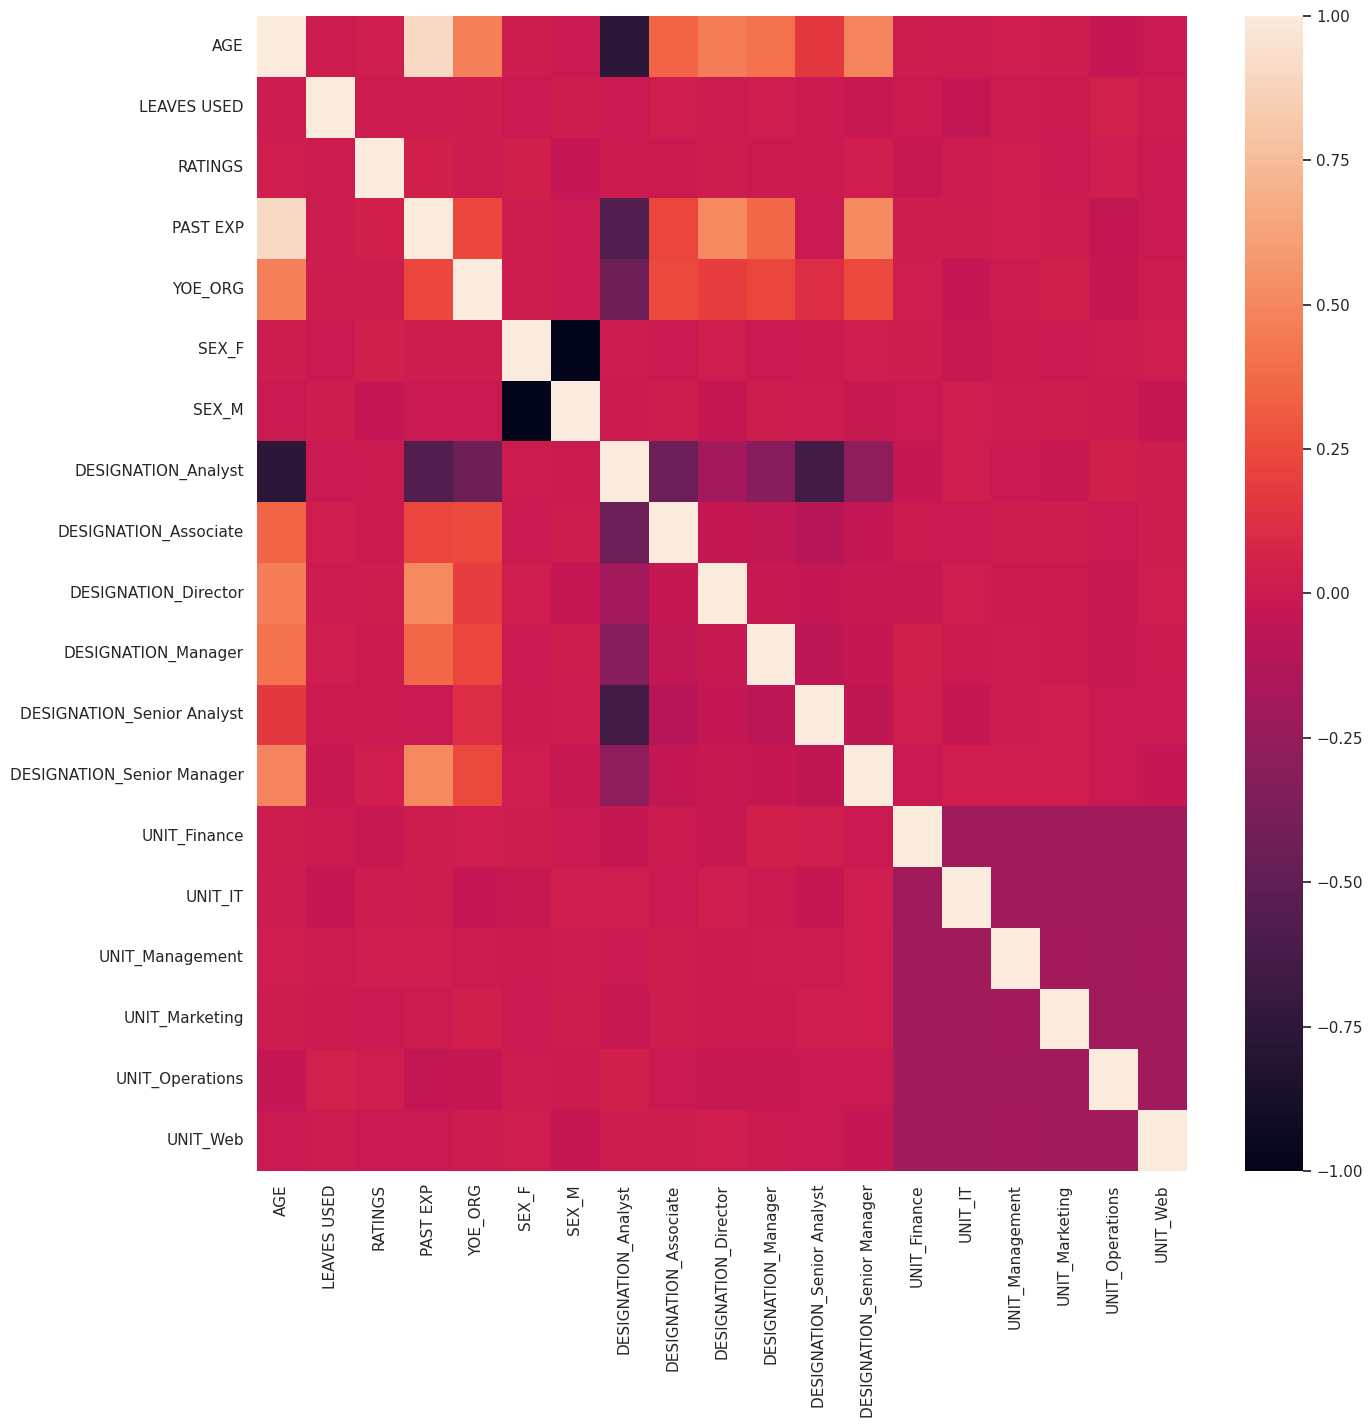

In [ ]:
plt.figure(figsize = (15, 15))
sns.heatmap(x.corr());

Here we see some highly correlated values, but I will check the results by both removing and not removing the highly correlate

In [ ]:
x.head()

,AGE,LEAVES USED,RATINGS,PAST EXP,YOE_ORG,SEX_F,SEX_M,DESIGNATION_Analyst,DESIGNATION_Associate,DESIGNATION_Director,DESIGNATION_Manager,DESIGNATION_Senior Analyst,DESIGNATION_Senior Manager,UNIT_Finance,UNIT_IT,UNIT_Management,UNIT_Marketing,UNIT_Operations,UNIT_Web
0,-0.953160,0.328786,-1.328226,-0.576583,-0.651983,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-0.185801,-1.193670,-0.431646,2.010436,-0.098501,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.953160,0.111292,-0.431646,-0.576583,-0.873375,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-0.697374,-0.106201,-0.431646,-0.576583,0.676373,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.185801,0.981267,-0.431646,0.532139,-1.205465,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
y.head()

0    44570
1    89207
2    40955
3    45550
4    43161
Name: SALARY, dtype: int64

In [ ]:
# Splitting into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.7, random_state = 101)

In [ ]:
# Checking feature importance
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [ ]:
print(model.feature_importances_)

[0.39180775 0.00525105 0.00984109 0.12513066 0.00691794 0.00108949
 0.00103769 0.04751039 0.02245597 0.24902097 0.02419256 0.02176166
 0.08298339 0.00376416 0.0010331  0.00112641 0.00315269 0.00083757
 0.00108547]


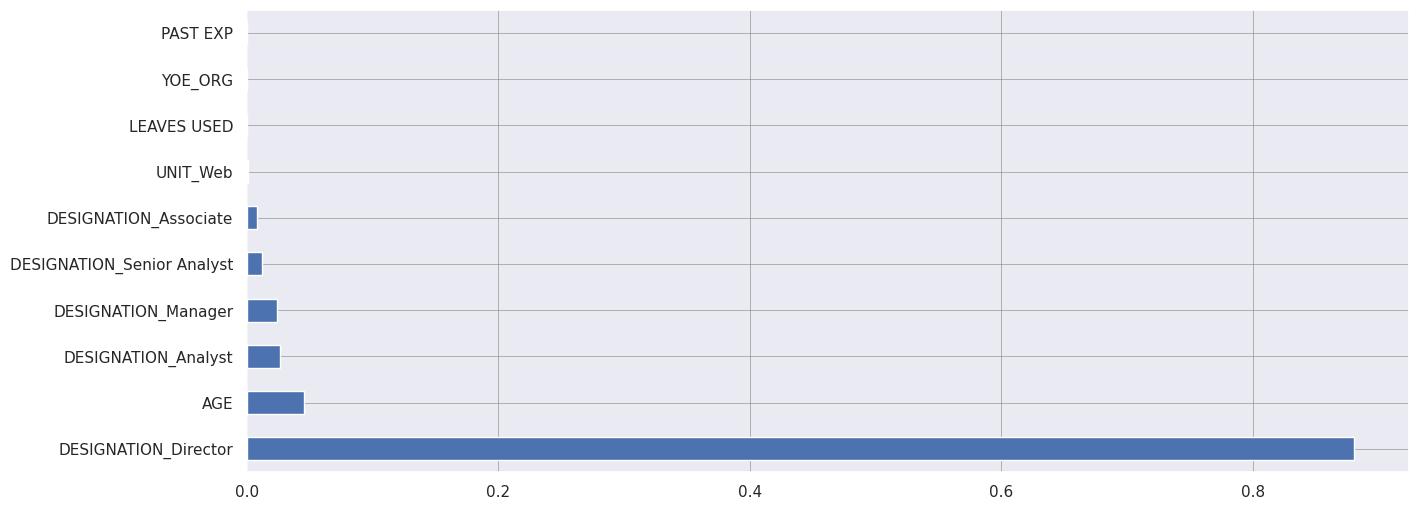

In [ ]:
plt.figure(figsize = (15, 6))
plt.grid(True, color = "grey", linewidth = "0.4")
feat_importances = pd.Series(model.feature_importances_, index = x.columns)
feat_importances.nlargest(10).plot(kind = 'barh')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [ ]:
print(lm.intercept_)

127845.59631248325


In [ ]:
coeff_df = pd.DataFrame(lm.coef_, x.columns, columns = ['Coefficient'])
coeff_df

,Coefficient
AGE,2527.657967
LEAVES USED,-198.670383
RATINGS,-87.118048
PAST EXP,-2415.770022
YOE_ORG,-474.659705
SEX_F,212.145727
SEX_M,-212.145727
DESIGNATION_Analyst,-82596.574988
DESIGNATION_Associate,-41276.760409
DESIGNATION_Director,142513.163428


In [ ]:
predictions = lm.predict(x_test)

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4352.955914479911
MSE: 73758803.02650191
RMSE: 8588.294535383722


In [ ]:
from sklearn.metrics import r2_score

# Assuming y_true and y_pred are your true and predicted values
# For example, after training a regression model

# Calculate the R-squared value
r_squared = r2_score(y_test, predictions)
r_squared

0.9469381817189597

In [ ]:
# Let's check with cross_val_score
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)

res = r2_score(y_test, y_pred)
print(res)

score = cross_val_score(lr_model, x, y, cv = 5, scoring = 'r2')

print('cross_val_score: ', score, score.mean(), score.std())

0.9469381817189597
cross_val_score:  [0.95487506 0.96152065 0.97025734 0.9381559  0.95111277] 0.9551843416372483 0.010714338855812374


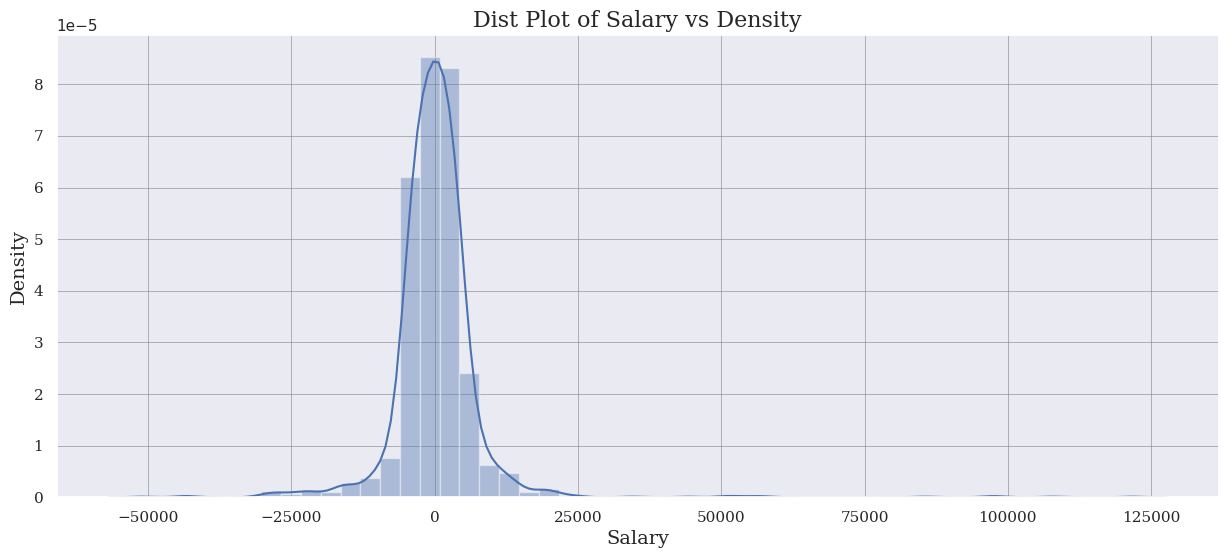

In [ ]:
plt.figure(figsize = (15, 6))
plt.grid(True, color = "grey", linewidth = "0.4")
sns.distplot(y_test-predictions)
plt.xlabel("Salary", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel("Density", fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title("Dist Plot of Salary vs Density", fontname = 'serif', fontsize = 16)
plt.show()

This closed Gaussian dist graph indicates that the difference between predicted and actual values is very minimal

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train, y_train)
y_pred = dt_model.predict(x_test)
res = r2_score(y_test, y_pred)
print(res)

score = cross_val_score(dt_model, x, y, cv = 5, scoring = 'r2')

print('cross_val_score: ', score, score.mean(), score.std())

0.9248776362766556
cross_val_score:  [0.92979105 0.92487155 0.88517577 0.89707777 0.90123091] 0.9076294117496652 0.016999257109933632


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)
res = r2_score(y_test, y_pred)
print(res)

score = cross_val_score(rf_model, x, y, cv = 5, scoring = 'r2')

print('cross_val_score: ', score, score.mean(), score.std())

0.9350404089756426
cross_val_score:  [0.94785675 0.94977013 0.94944564 0.93257111 0.94069058] 0.9440668418743009 0.0066237962304912775


In [ ]:
import xgboost as xgb

model = xgb.XGBRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
res = r2_score(y_test, y_pred)
print(res)

score = cross_val_score(model, x, y, cv = 5, scoring = 'r2')

print('cross_val_score: ', score, score.mean(), score.std())

0.9132593214652497
cross_val_score:  [0.94188062 0.93585586 0.93457194 0.92479137 0.90730223] 0.9288804045900012 0.01210284408440941


Linear Regression model gives the best r2 score

In [ ]:
# Predicting on unknown values
pre = [-0.176523, -1.654231, -2.234765, 0.213225, -0.993421, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
pre_reshaped = np.array(pre).reshape(1, -1)
lr_model.predict(pre_reshaped)

array([44701.66944042])

We will use the Linear Regression model



In [ ]:
# Saving model using pickle
import pickle

# Open a file, where I want to store the data
file = open('/content/drive/MyDrive/folders/linreg_model.pkl', 'wb')

# Dump info to that file
pickle.dump(lr_model, file)